In [4]:
import pandas as pd

# Load each file
products_df = pd.read_csv(r"C:\Users\mgag2\OneDrive\Documentos\Data\CRM+Sales+Opportunities\products.csv")
accounts_df = pd.read_csv(r"C:\Users\mgag2\OneDrive\Documentos\Data\CRM+Sales+Opportunities\accounts.csv")
sales_teams_df = pd.read_csv(r"C:\Users\mgag2\OneDrive\Documentos\Data\CRM+Sales+Opportunities\sales_teams.csv")
sales_pipeline_df = pd.read_csv(r"C:\Users\mgag2\OneDrive\Documentos\Data\CRM+Sales+Opportunities\sales_pipeline.csv")

In [409]:
# See only headers
print(sales_pipeline_df.columns.tolist())
print(accounts_df.columns.tolist())
print(products_df.columns.tolist())
print(sales_teams_df.columns.tolist())

['opportunity_id', 'sales_agent', 'product', 'account', 'deal_stage', 'engage_date', 'close_date', 'close_value']
['account', 'sector', 'year_established', 'revenue', 'employees', 'office_location', 'subsidiary_of']
['product', 'series', 'sales_price']
['sales_agent', 'manager', 'regional_office']


In [411]:
# See data
print(sales_pipeline_df.head())
print(products_df.head())
print(accounts_df.head())
print(sales_teams_df.head())

  opportunity_id      sales_agent         product  account deal_stage  \
0       1C1I7A6R      Moses Frase  GTX Plus Basic  Cancity        Won   
1       Z063OYW0  Darcel Schlecht          GTXPro    Isdom        Won   
2       EC4QE1BX  Darcel Schlecht      MG Special  Cancity        Won   
3       MV1LWRNH      Moses Frase       GTX Basic  Codehow        Won   
4       PE84CX4O        Zane Levy       GTX Basic   Hatfan        Won   

  engage_date  close_date  close_value  
0  2016-10-20  2017-03-01       1054.0  
1  2016-10-25  2017-03-11       4514.0  
2  2016-10-25  2017-03-07         50.0  
3  2016-10-25  2017-03-09        588.0  
4  2016-10-25  2017-03-02        517.0  
        product series  sales_price
0     GTX Basic    GTX          550
1       GTX Pro    GTX         4821
2    MG Special     MG           55
3   MG Advanced     MG         3393
4  GTX Plus Pro    GTX         5482
            account     sector  year_established  revenue  employees  \
0  Acme Corporation  techno

In [415]:
#Check data with custom function based on describe
from custom_summary import custom_describe
custom_describe(sales_pipeline_df)

,Column,Type,Count,Unique,Missing,Min,Max,Average
0,opportunity_id,object,8800,8800,0,NaN,NaN,NaN
1,sales_agent,object,8800,30,0,NaN,NaN,NaN
2,product,object,8800,7,0,NaN,NaN,NaN
3,account,object,7375,85,1425,NaN,NaN,NaN
4,deal_stage,object,8800,4,0,NaN,NaN,NaN
5,engage_date,object,8300,421,500,NaN,NaN,NaN
6,close_date,object,6711,306,2089,NaN,NaN,NaN
7,close_value,float64,6711,2051,2089,0.0,30288.0,1490.915512


The data is mostly clean, but there is a couple of things we need to handle.
1. There's a product name that was incorrectly added to the pipeline file.
2. There are 1425 missing values for account in the pipeline file.

In [6]:
# Fixing product name in sales_pipeline
# Replace only in the 'product' column
sales_pipeline_df['product'] = sales_pipeline_df['product'].replace("GTXPro", "GTX Pro")

I will create a single data frame by combining all the files using their respective keys.

In [8]:
# Merge sales pipeline with products
sales_with_products = pd.merge(sales_pipeline_df, products_df, on="product", how="left")

In [421]:
# Ensure all rows are matched
num_unmatched = sales_with_products['product'].isna().sum()
if num_unmatched == 0:
    print("All products matched!")
else:
    print(f"There are {num_unmatched} unmatched products.")

All products matched!


In [10]:
# Merge result with accounts
sales_with_accounts = pd.merge(sales_with_products, accounts_df, on="account", how="left")

In [425]:
num_unmatched = sales_with_accounts['account'].isna().sum()
if num_unmatched == 0:
    print("All accounts matched!")
else:
    print(f"There are {num_unmatched} unmatched accounts.")

There are 1425 unmatched accounts.


As we expected, 1425 lines didn't match due to missing values.

In [158]:
# Merge result with sales teams
sales_df = pd.merge(sales_with_accounts, sales_teams_df, on="sales_agent", how="left")

In [429]:
num_unmatched = sales_df['sales_agent'].isna().sum()
if num_unmatched == 0:
    print("All sales agents matched!")
else:
    print(f"There are {num_unmatched} unmatched sales agents.")

All sales agents matched!


In [431]:
print(sales_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8800 entries, 0 to 8799
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   opportunity_id    8800 non-null   object 
 1   sales_agent       8800 non-null   object 
 2   product           8800 non-null   object 
 3   account           7375 non-null   object 
 4   deal_stage        8800 non-null   object 
 5   engage_date       8300 non-null   object 
 6   close_date        6711 non-null   object 
 7   close_value       6711 non-null   float64
 8   series            8800 non-null   object 
 9   sales_price       8800 non-null   int64  
 10  sector            7375 non-null   object 
 11  year_established  7375 non-null   float64
 12  revenue           7375 non-null   float64
 13  employees         7375 non-null   float64
 14  office_location   7375 non-null   object 
 15  subsidiary_of     1292 non-null   object 
 16  manager           8800 non-null   object 


In [447]:
print(sales_df.columns.tolist())

['opportunity_id', 'sales_agent', 'product', 'account', 'deal_stage', 'engage_date', 'close_date', 'close_value', 'series', 'sales_price', 'sector', 'year_established', 'revenue', 'employees', 'office_location', 'subsidiary_of', 'manager', 'regional_office']


A single data frame containing 18 columns was created.

In [24]:
print(sales_df['deal_stage'].unique())

['Won' 'Engaging' 'Lost' 'Prospecting']


I will create a new column named 'main_stage' to rename the Won and Lost stages.

In [160]:
# Function to determine main_stage
def determine_main_stage(deal_stage):
    if deal_stage == 'Won':
        return 'Closed Won'
    elif deal_stage == 'Lost':
        return 'Closed Lost'
    else:
        return deal_stage

# Apply the function to create next_stage column
sales_df['main_stage'] = sales_df['deal_stage'].apply(determine_main_stage)
print(sales_df.columns.tolist())

['opportunity_id', 'sales_agent', 'product', 'account', 'deal_stage', 'engage_date', 'close_date', 'close_value', 'series', 'sales_price', 'sector', 'year_established', 'revenue', 'employees', 'office_location', 'subsidiary_of', 'manager', 'regional_office', 'main_stage']


In [22]:
print(sales_df['main_stage'].unique())

['Closed Won' 'Engaging' 'Closed Lost' 'Prospecting']


I want to show the stages in a Sankey Diagram, but since we have opportunities in the Prospecting stage (the first stage), those deals will point to themselves. To avoid this, I will create a previous stage named 'Research,' which will contain the total number of deals.

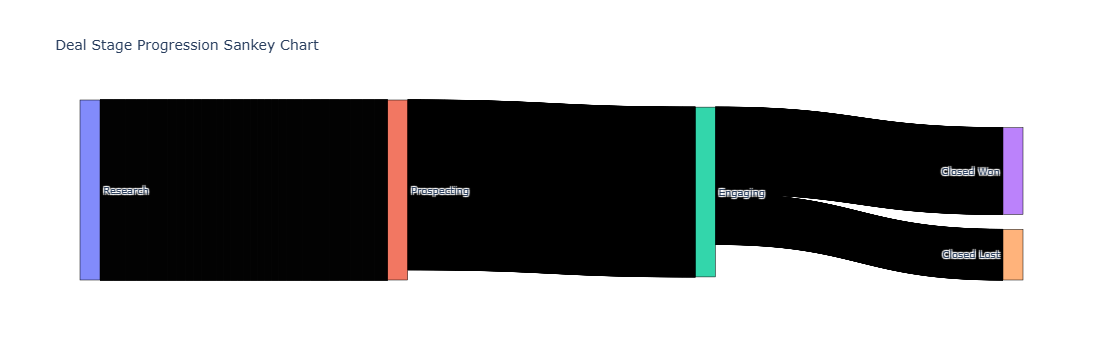

In [457]:
import plotly.graph_objects as go
import pandas as pd

# Define the stage progression
stage_progression = {
    'Research': ['Research'],
    'Prospecting': ['Research','Prospecting'],
    'Engaging': ['Research','Prospecting', 'Engaging'],
    'Closed Won': ['Research','Prospecting', 'Engaging', 'Closed Won'],
    'Closed Lost': ['Research','Prospecting', 'Engaging', 'Closed Lost']
}

# Generate Cumulative Transitions
cumulative_data = []
for _, row in sales_df.iterrows():
    # Get the cumulative stages based on the main_stage
    stages = stage_progression.get(row['main_stage'], [])
    if stages:
        # Create transitions between cumulative stages
        for i in range(len(stages)-1):
            cumulative_data.append({
                'deal_id': row['opportunity_id'],       # The unique ID of the deal
                'source': stages[i],            # The current stage
                'target': stages[i + 1],        # The next stage
                'final_stage': row['main_stage'], # The final stage of the deal
            })

# Prepare the data for Sankey chart
sources = []
targets = []
values = []

# Map stages to integer indices
stage_labels = ['Research','Prospecting', 'Engaging', 'Closed Won', 'Closed Lost']
stage_indices = {stage: idx for idx, stage in enumerate(stage_labels)}

# Calculate the flow (value) between stages
for transition in cumulative_data:
    source_idx = stage_indices[transition['source']]
    target_idx = stage_indices[transition['target']]
    
    # Count occurrences of the transitions
    sources.append(source_idx)
    targets.append(target_idx)
    values.append(1)  # Each transition counts as 1

# Create the Sankey chart
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=stage_labels
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values
    )
))

# Update layout and show the chart
fig.update_layout(title="Deal Stage Progression Sankey Chart", font_size=10)
fig.show()

## How is each sales team performing comparing to the rest?

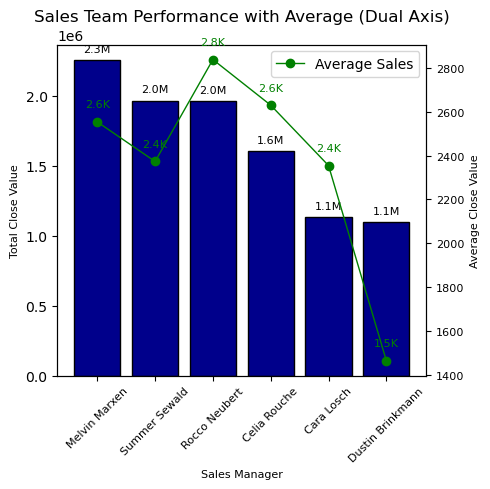

In [90]:

import matplotlib.pyplot as plt

# Group by 'manager' (or 'sales_agent') and calculate total close_value
performance_by_team = sales_df[sales_df['deal_stage'] == 'Won'].groupby('manager')['close_value'].sum().sort_values(ascending=False)

# Calculate the average for each sales team and reorder to match the total performance order
average_sales_per_team = sales_df[sales_df['deal_stage'] == 'Won'].groupby('manager')['close_value'].mean()
average_sales_per_team = average_sales_per_team[performance_by_team.index]

# Create a figure and a set of subplots with dual y-axes
fig, ax1 = plt.subplots(figsize=(5, 5))

# Create the bar chart for total sales
ax1.bar(performance_by_team.index, performance_by_team.values, color='darkblue', edgecolor='black')

# Add values on top of the bars
for idx, value in enumerate(performance_by_team):
    ax1.text(idx, value + 0.02 * performance_by_team.max(), f'{value / 1e6:.1f}M', ha='center', va='bottom', fontsize=8)

# Set labels and title for the first axis (total sales)
ax1.set_title('Sales Team Performance with Average (Dual Axis)', fontsize=12)
ax1.set_xlabel('Sales Manager', fontsize=8)
ax1.set_ylabel('Total Close Value', fontsize=8)
ax1.tick_params(axis='x', rotation=45, labelsize=8)

# Create the second y-axis to plot the average sales
ax2 = ax1.twinx()
ax2.plot(average_sales_per_team.index, average_sales_per_team.values, color='green', marker='o', label='Average Sales', linewidth=1)

# Add the average sales values on top of the trend line
for idx, value in enumerate(average_sales_per_team):
    ax2.text(idx, value + 0.02 * average_sales_per_team.max(), f'{value / 1000:,.1f}K', ha='center', va='bottom', fontsize=8, color='green')

# Set labels for the second axis (average sales)
ax2.set_ylabel('Average Close Value', fontsize=8)
ax2.tick_params(axis='y', labelsize=8)

# Show the legend
ax2.legend(loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

Dustin Brinkmann's team is underperforming; his closed value is one of the lowest, and the average of their closed deals is 60% below the second lowest.

## Are any sales agent lagging behind?

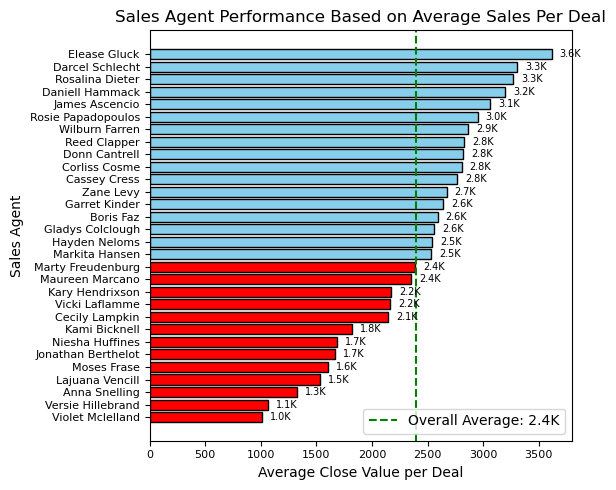

In [92]:
# Calculate average sales per deal for each agent
average_sales_by_agent = sales_df[sales_df['deal_stage'] == 'Won'].groupby('sales_agent')['close_value'].mean()

# Calculate the overall average sales per deal
overall_average_sales = average_sales_by_agent.mean()

# Sort average sales by agent in ascending order
average_sales_by_agent = average_sales_by_agent.sort_values()

# Create a color map: agents below average in red, others in blue
colors = ['red' if value < overall_average_sales else 'skyblue' for value in average_sales_by_agent]

# Create the horizontal bar chart
fig, ax = plt.subplots(figsize=(6, 5))
bars = ax.barh(average_sales_by_agent.index, average_sales_by_agent.values, color=colors, edgecolor='black')

# Add a vertical line for the overall average sales
ax.axvline(overall_average_sales, color='green', linestyle='--', label=f'Overall Average: {overall_average_sales/1000:,.1f}K')

# Add labels to the bars
for bar in bars:
    width = bar.get_width()
    ax.text(width + 0.02 * average_sales_by_agent.max(), bar.get_y() + bar.get_height() / 2,
            f'{width/1000:,.1f}K', va='center', ha='left', fontsize=7)

# Set titles and labels
ax.set_title('Sales Agent Performance Based on Average Sales Per Deal', fontsize=12)
ax.set_xlabel('Average Close Value per Deal', fontsize=10)
ax.set_ylabel('Sales Agent', fontsize=10)
ax.tick_params(axis='y', labelsize=8)
ax.tick_params(axis='x', labelsize=8)

# Add a legend
ax.legend(loc='lower right')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

Let's see this chart in a different way

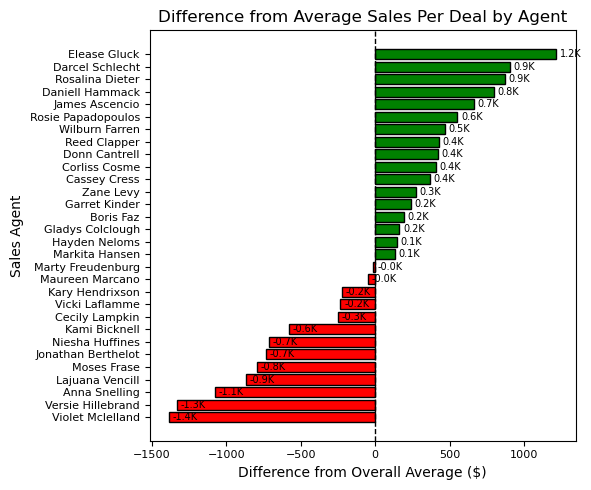

In [96]:

# Calculate average sales per deal for each agent
average_sales_by_agent = sales_df[sales_df['deal_stage'] == 'Won'].groupby('sales_agent')['close_value'].mean()

# Calculate the overall average sales per deal
overall_average_sales = average_sales_by_agent.mean()

# Calculate the difference from the overall average
difference_from_average = average_sales_by_agent - overall_average_sales

# Sort the differences for a cleaner visualization
difference_from_average = difference_from_average.sort_values()

# Create a color map: red for below average, green for above average
colors = ['red' if diff < 0 else 'green' for diff in difference_from_average]

# Create the horizontal bar chart
fig, ax = plt.subplots(figsize=(6, 5))
bars = ax.barh(difference_from_average.index, difference_from_average.values, color=colors, edgecolor='black')

# Add labels to the bars
for bar in bars:
    width = bar.get_width()
    ax.text(width + (0.02 * difference_from_average.max()), bar.get_y() + bar.get_height() / 2,
            f'{width/1000:,.1f}K', va='center', ha='left', fontsize=7)

# Add a vertical line at 0 for reference
ax.axvline(0, color='black', linestyle='--', linewidth=1)

# Set titles and labels
ax.set_title('Difference from Average Sales Per Deal by Agent', fontsize=12)
ax.set_xlabel('Difference from Overall Average ($)', fontsize=10)
ax.set_ylabel('Sales Agent', fontsize=10)
ax.tick_params(axis='y', labelsize=8)
ax.tick_params(axis='x', labelsize=8)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

We can see that 8 sales agents are $500 or more below the overall close amount average, and 3 of them are $1K or more below that.

## Can you identify any quarter-over-quarter trends?

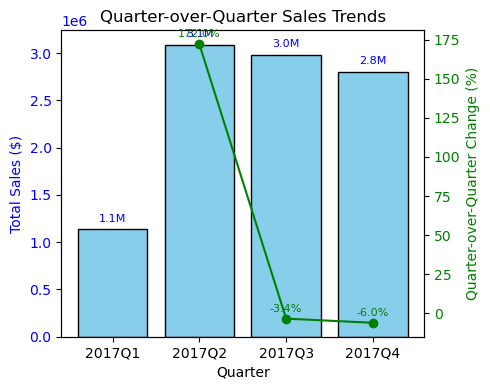

In [162]:
# Ensure 'close_date' is in datetime format
sales_df['close_date'] = pd.to_datetime(sales_df['close_date'])

# Extract Year and Quarter from 'close_date'
sales_df['year_quarter'] = sales_df['close_date'].dt.to_period('Q')

# Convert the Period to string for plotting
sales_df['year_quarter_str'] = sales_df['year_quarter'].astype(str)

# Calculate total sales per quarter
sales_by_quarter = sales_df[sales_df['deal_stage'] == 'Won'].groupby('year_quarter_str')['close_value'].sum()

# Calculate the quarter-over-quarter change
quarter_over_quarter_change = sales_by_quarter.pct_change() * 100  # Percentage change

# Plot the total sales per quarter and quarter-over-quarter change
fig, ax1 = plt.subplots(figsize=(5, 4))

# Bar chart for total sales per quarter
bars = ax1.bar(sales_by_quarter.index, sales_by_quarter.values, color='skyblue', edgecolor='black')
ax1.set_xlabel('Quarter')
ax1.set_ylabel('Total Sales ($)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Add values on top of the bars
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height + 0.02 * sales_by_quarter.max(),
             f'{height/1e6:,.1f}M', ha='center', va='bottom', fontsize=8, color='blue')

# Create a second y-axis to plot the quarter-over-quarter change
ax2 = ax1.twinx()
ax2.plot(quarter_over_quarter_change.index, quarter_over_quarter_change.values, color='green', marker='o', label='QoQ Change (%)')
ax2.set_ylabel('Quarter-over-Quarter Change (%)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Add values on the line chart
for i, value in enumerate(quarter_over_quarter_change.values):
    if not pd.isna(value):  # Skip NaN (first quarter with no previous quarter to compare)
        ax2.annotate(f'{value:,.1f}%', (quarter_over_quarter_change.index[i], value),
                     textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8, color='green')

# Add a title
plt.title('Quarter-over-Quarter Sales Trends')

# Show the plot
plt.tight_layout()
plt.show()

Sales have slightly decreased after the second quarter.

## Do any products have better win rates?

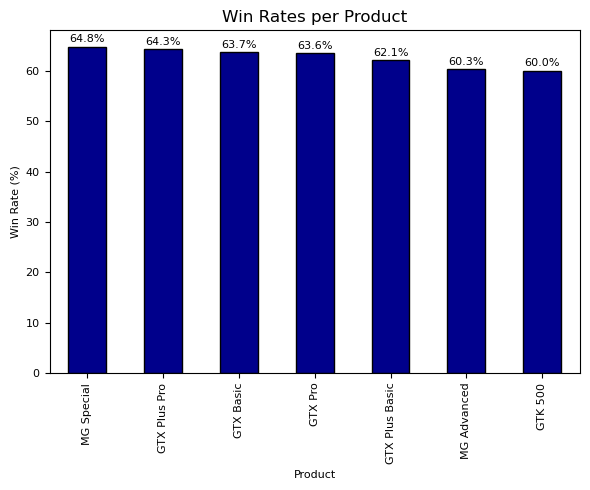

In [148]:
# Filter the data for "Won" deals
won_deals_df = sales_df[sales_df['deal_stage'] == 'Won']

# Calculate the total number of deals and won deals for each product
total_deals_per_product = sales_df[sales_df['deal_stage'].isin(['Won', 'Lost'])].groupby('product').size()
won_deals_per_product = won_deals_df.groupby('product').size()

# Calculate the win rate for each product
win_rate_per_product = (won_deals_per_product / total_deals_per_product) * 100

# Sort win rates in descending order for better visualization
win_rate_per_product = win_rate_per_product.sort_values(ascending=False)

# Plot the win rates
plt.figure(figsize=(6, 5))
win_rate_per_product.plot(kind='bar', color='darkblue', edgecolor='black', fontsize=8)

# Add labels and title
plt.title('Win Rates per Product', fontsize=12)
plt.xlabel('Product', fontsize=8)
plt.ylabel('Win Rate (%)', fontsize=8)

# Display the values on top of the bars
for i, value in enumerate(win_rate_per_product):
    plt.text(i, value + 0.5, f'{value:.1f}%', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

Win rates by product are homogeneous. There's less than a 5% difference between the highest and the lowest.

## Can we predict whether the opportunities in the engaged stage will be won?

The number of features < number of training samples, and we have a mixture of categorical and numeric features.
We can use XGBoost to predict close stage for prospecting and engaged deals.

In [164]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Prepare the dataset
df = sales_df[~sales_df['main_stage'].isin(['Prospecting', 'Engaging'])].copy()

# Encode categorical variables (excluding opportunity_id)
categorical_columns = ['sales_agent', 'product', 'sector', 'account']
label_encoders = {}

# Handle categorical encoding
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoder for later use

# Fill missing values
df = df.infer_objects(copy=False)

# Define features and target
X = df[['sales_agent', 'product', 'sales_price', 'sector', 'account', 'revenue', 'employees']]
y = df['deal_stage'].map({'Won': 1, 'Lost': 0})

# Separate the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    random_state=42,
    eval_metric='logloss'
)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Print evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC Score: {roc_auc:.2f}")

# Get the list of unique sales agents in the training set
known_agents = X_train['sales_agent'].unique()

# Load prospecting/engaging data
prospecting_data = sales_df[sales_df['main_stage'].isin(['Prospecting', 'Engaging'])].copy()

# Preserve the original opportunity_id
original_opportunity_id = prospecting_data['opportunity_id']

# Handle missing account values
prospecting_data['account'] = prospecting_data['account'].fillna('Unknown')

# Apply label encoders to prospecting_data
for col in categorical_columns:
    le = label_encoders[col]
    # Transform existing classes and set unknown classes to -1
    prospecting_data[col] = prospecting_data[col].map(lambda x: le.transform([x])[0] if x in le.classes_ else -1)

# Filter out rows with unknown sales agents
prospecting_data = prospecting_data[prospecting_data['sales_agent'].isin(known_agents)]

# Prepare features for prediction
X_prospecting = prospecting_data[['sales_agent', 'product', 'sales_price', 'sector', 'account', 'revenue', 'employees']]

# Make predictions for prospecting data
prospecting_data['Predicted_Outcome'] = model.predict(X_prospecting)
prospecting_data['Win_Probability'] = model.predict_proba(X_prospecting)[:, 1]

# Add the original opportunity_id back to the output
prospecting_data['opportunity_id'] = original_opportunity_id

# Ensure opportunity_id is included in the output
output = prospecting_data[['opportunity_id', 'sales_agent', 'product', 'Predicted_Outcome', 'Win_Probability']]

# Display the results
print(output)


Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.05      0.09       507
           1       0.62      0.94      0.75       836

    accuracy                           0.61      1343
   macro avg       0.48      0.50      0.42      1343
weighted avg       0.52      0.61      0.50      1343

ROC-AUC Score: 0.50
     opportunity_id  sales_agent  product  Predicted_Outcome  Win_Probability
9          HAXMC4IX           12        5                  1         0.788492
25         UP409DSB           19        5                  1         0.527701
42         EG7OFLFR           14        1                  0         0.442620
44         OLVI7L8M            2        4                  1         0.769745
56         F5U1ACDD           14        2                  1         0.658952
...             ...          ...      ...                ...              ...
8795       9MIWFW5J           25        5                  1         0.546932
8796  

The ROC score is too low; it's like guessing or flipping a coin.

Let's try handle possible imbalance

Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.05      0.09       507
           1       0.62      0.94      0.75       836

    accuracy                           0.61      1343
   macro avg       0.48      0.50      0.42      1343
weighted avg       0.52      0.61      0.50      1343

ROC-AUC Score: 0.50
Feature Importance:


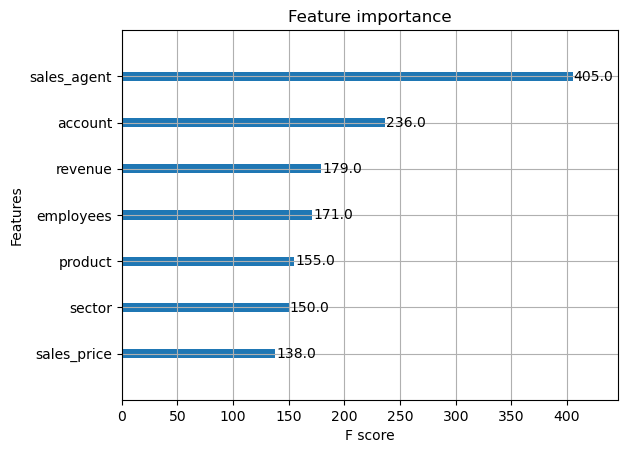

     opportunity_id  sales_agent  product  Predicted_Outcome  Win_Probability
9          HAXMC4IX           12        5                  1         0.788492
25         UP409DSB           19        5                  1         0.527701
42         EG7OFLFR           14        1                  0         0.442620
44         OLVI7L8M            2        4                  1         0.769745
56         F5U1ACDD           14        2                  1         0.658952
...             ...          ...      ...                ...              ...
8795       9MIWFW5J           25        5                  1         0.546932
8796       6SLKZ8FI           25        5                  1         0.546932
8797       LIB4KUZJ           25        5                  1         0.546932
8798       18IUIUK0           25        5                  1         0.546932
8799       8I5ONXJX           25        5                  1         0.546932

[2089 rows x 5 columns]


In [170]:
from xgboost import plot_importance

# Define features and target
X2 = df[['sales_agent', 'product', 'sales_price', 'sector', 'account', 'revenue', 'employees']]
y2 = df['deal_stage'].map({'Won': 1, 'Lost': 0})  # Convert target to binary

# Split the dataset into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Handle class imbalance by calculating scale_pos_weight
scale_pos_weight = len(y2_train[y2_train == 0]) / len(y2_train[y2_train == 1])

# Initialize the XGBClassifier with class weight handling
model2 = XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    eval_metric='logloss'
)

# Train the model
model2.fit(X_train, y_train)

# Make predictions on the test set
y2_pred = model.predict(X2_test)
y2_proba = model.predict_proba(X2_test)[:, 1]  # Probabilities for the positive class

# Print evaluation metrics
print("Classification Report:")
print(classification_report(y2_test, y2_pred))

# Calculate and print the ROC-AUC score
roc_auc = roc_auc_score(y2_test, y2_proba)
print(f"ROC-AUC Score: {roc_auc:.2f}")

# Feature importance analysis
print("Feature Importance:")
plot_importance(model2)
plt.show()

# Handle prospecting and engaging deals
prospecting_data2 = sales_df[sales_df['main_stage'].isin(['Prospecting', 'Engaging'])].copy()

# Encode prospecting data using the same encoders as training data
for col in categorical_columns:
    prospecting_data2[col] = prospecting_data2[col].map(
        lambda x: label_encoders[col].transform([x])[0] if x in label_encoders[col].classes_ else -1
    )

# Define the same features for prospecting data
prospecting_data_X2 = prospecting_data2[['sales_agent', 'product', 'sales_price', 'sector', 'account', 'revenue', 'employees']]

# Predict outcomes and probabilities for prospecting data
prospecting_data2['Predicted_Outcome'] = model.predict(prospecting_data_X2)
prospecting_data2['Win_Probability'] = model.predict_proba(prospecting_data_X2)[:, 1]

# Display prospecting data with predictions
print(prospecting_data[['opportunity_id', 'sales_agent', 'product', 'Predicted_Outcome', 'Win_Probability']])

Using win rate as new feature

In [176]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score

# Filter out 'Prospecting' and 'Engaging' from the main dataset for prediction
prospecting_data = sales_df[sales_df['main_stage'].isin(['Prospecting', 'Engaging'])].copy()
# Excluding opportunities without account
prospecting_data = prospecting_data[~prospecting_data['account'].isnull()]

# Encode categorical variables in both prospecting data and training data using label encoding
categorical_columns = ['sales_agent', 'product', 'sector', 'account']

label_encoders = {}  # To store encoders for later use
for col in categorical_columns:
    le = LabelEncoder()
    sales_df[col] = le.fit_transform(sales_df[col])  # Apply encoding to the full sales_df
    prospecting_data[col] = le.transform(prospecting_data[col])  # Apply encoding to prospecting_data
    label_encoders[col] = le  # Save encoder for later use

# Filter the main dataset to only include rows where 'deal_stage' is either 'Won' or 'Lost'
valid_deal_stages = ['Won', 'Lost']
sales_data_valid = sales_df[sales_df['deal_stage'].isin(valid_deal_stages)].copy()

# Group by sales_agent, product, account, sector and deal_stage to calculate 'Won' and 'Lost' counts
won_lost_counts = sales_data_valid.groupby(
    ['sales_agent', 'product', 'account', 'sector', 'deal_stage']
).size().unstack(fill_value=0)

# Calculate Won/Lost ratio: Won / Lost (add 1 to avoid division by zero)
won_lost_counts['Won_Lost_Ratio'] = won_lost_counts['Won'] / (won_lost_counts['Lost'] + 1)

# Calculate Win rate: Won / (Won + Lost)
won_lost_counts['Win_Rate'] = won_lost_counts['Won'] / (won_lost_counts['Won'] + won_lost_counts['Lost'])

# Merge these calculated features back into the main sales data
sales_data_valid = sales_data_valid.merge(
    won_lost_counts[['Won_Lost_Ratio', 'Win_Rate']],
    on=['sales_agent', 'product', 'account', 'sector'],
    how='left'
)

# Prepare the features for training the model
X = sales_data_valid[['sales_agent', 'product', 'sales_price', 'sector', 'account', 'revenue', 'employees', 'Win_Rate']]
y = sales_data_valid['deal_stage'].map({'Won': 1, 'Lost': 0})  # Convert target to binary

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model with enable_categorical=True
model = XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]),
    random_state=42,
    enable_categorical=True  # This enables categorical handling
)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Evaluate model performance
print("Classification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC Score: {roc_auc:.2f}")

# For prospecting data (i.e., deals in 'Prospecting' and 'Engaging' stages), add the features we calculated
prospecting_data = prospecting_data.merge(
    won_lost_counts[['Win_Rate']],
    on=['sales_agent', 'product', 'account', 'sector'],
    how='left'
)

# Prepare features for prediction on prospecting data
prospecting_data_X = prospecting_data[['sales_agent', 'product', 'sales_price', 'sector', 'account', 'revenue', 'employees', 'Win_Rate']]

# Predict outcomes and probabilities for prospecting data
prospecting_data.loc[:, 'Predicted_Outcome'] = model.predict(prospecting_data_X)
prospecting_data.loc[:, 'Win_Probability'] = model.predict_proba(prospecting_data_X)[:, 1]

# Display the required columns
final_output = prospecting_data[['opportunity_id', 'sales_agent', 'product', 'Predicted_Outcome', 'Win_Probability']]

print(final_output.head(20))


Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.86      0.74       507
           1       0.89      0.73      0.80       836

    accuracy                           0.78      1343
   macro avg       0.78      0.79      0.77      1343
weighted avg       0.80      0.78      0.78      1343

ROC-AUC Score: 0.88
   opportunity_id  sales_agent  product  Predicted_Outcome  Win_Probability
0        UP409DSB           19        5                  1         0.999536
1        0DRC1U9Q           19        1                  0         0.000676
2        M7I5O9YU            4        1                  1         0.999428
3        VDIU10RV           17        6                  0         0.000699
4        579LZ3F9            5        2                  1         0.999536
5        SU8JNMP4           14        2                  1         0.999567
6        PFFHM7HR           17        5                  1         0.999554
7        ICMXZOVL     

The ROC score improved to 0.88; this is acceptable.

Let's predict how many opportunities we will won.

In [178]:
print(final_output.count())

opportunity_id       664
sales_agent          664
product              664
Predicted_Outcome    664
Win_Probability      664
dtype: int64


We can only predict 664 opportunities

In [182]:
# Checking opportunities we can predict

# DataFrames
df1 = sales_df.copy()
df2 = final_output.copy()

# Define the columns for comparison
columns_to_check = ['opportunity_id']

# Merge opportunities we can predict
merged = df1.merge(df2, how='right', indicator=False)

print(merged)

    opportunity_id  sales_agent  product  account   deal_stage engage_date  \
0         UP409DSB           19        5       24     Engaging  2016-11-10   
1         0DRC1U9Q           19        1       31     Engaging  2016-11-20   
2         M7I5O9YU            4        1        9     Engaging  2016-11-23   
3         VDIU10RV           17        6       45     Engaging  2016-11-23   
4         579LZ3F9            5        2       39     Engaging  2016-11-24   
..             ...          ...      ...      ...          ...         ...   
659       VW8CEV4C           25        6       43  Prospecting         NaN   
660       KLUS7RVS           25        6       51  Prospecting         NaN   
661       ROM4I2T0           25        6       58  Prospecting         NaN   
662       FCNN6UY0           25        5       24  Prospecting         NaN   
663       8M2O0Q8V           25        5       61  Prospecting         NaN   

    close_date  close_value series  sales_price  ...  employees

In [248]:
from sklearn.preprocessing import LabelEncoder

# Group by encoded_sales_agent and count predicted outcomes
grouped = final_output.groupby(['sales_agent', 'Predicted_Outcome']).size().unstack(fill_value=0)

# Add original sales_agent names to the grouped DataFrame
grouped['sales_agent'] = [label_encoders['sales_agent'].inverse_transform([i])[0] for i in grouped.index]

# Reorganize the DataFrame for readability
grouped.reset_index(drop=True, inplace=True)
grouped = grouped[['sales_agent', 0, 1]]  # Order columns (0 for Lost, 1 for Won)
grouped.columns = ['sales_agent', 'Lost', 'Won']  # Rename columns

# Display the final output
print(grouped)

           sales_agent  Lost  Won
0        Anna Snelling     3   40
1            Boris Faz     2   16
2         Cassey Cress     2   27
3       Cecily Lampkin     4    6
4        Corliss Cosme     3   24
5      Daniell Hammack     1   24
6      Darcel Schlecht    14   46
7         Elease Gluck     0   18
8     Gladys Colclough     5   25
9        Hayden Neloms     1   13
10      James Ascencio     0   17
11  Jonathan Berthelot     3   20
12       Kami Bicknell     5   24
13     Kary Hendrixson     3   34
14     Lajuana Vencill     2   21
15      Markita Hansen     3   24
16   Marty Freudenburg     2   32
17     Maureen Marcano     1   15
18         Moses Frase     3   18
19     Niesha Huffines     1   24
20     Rosalina Dieter     1   15
21  Rosie Papadopoulos     2   13
22   Versie Hillebrand     3   25
23      Vicki Laflamme     4   23
24    Violet Mclelland     0   20
25      Wilburn Farren     0    3
26           Zane Levy     5   24


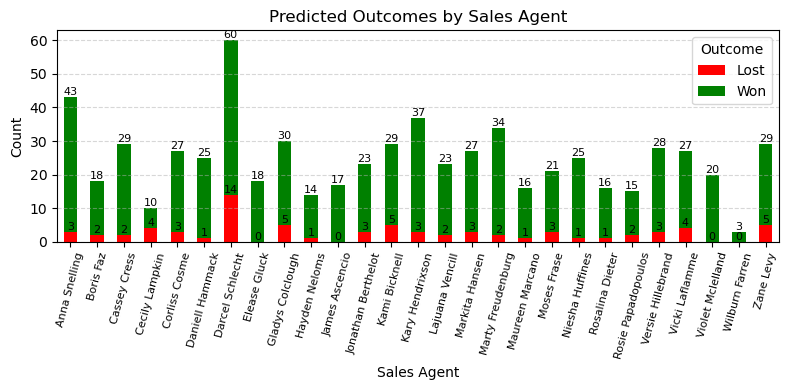

In [250]:
# Plotting
grouped.set_index('sales_agent', inplace=True)
ax = grouped.plot(kind='bar', figsize=(8, 4), stacked=True, color=['red', 'green'])

# Add labels and title
plt.title('Predicted Outcomes by Sales Agent', fontsize=12)
plt.xlabel('Sales Agent', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks(rotation=75, fontsize=8)
plt.legend(title='Outcome', labels=['Lost', 'Won'], fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show values on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=8)

plt.tight_layout()
plt.show()

In [212]:
# Select relevant columns for export, including original (non-encoded) columns
export_columns = ["opportunity_id", "sales_agent", "product", "account", "Predicted_Outcome", "Win_Probability"]
results_to_export = prospecting_data[export_columns]

# Export results to a CSV file
output_file = "predicted_deals.csv"
results_to_export.to_csv(output_file, index=False)

print(f"Results successfully exported to {output_file}")

Results successfully exported to predicted_deals.csv
